In [1]:
# Importing all the Required Libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv('ML_dataset_2.0.csv')
df.head()                                               

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.748   0.916    6    -2.634     1       0.0583        0.1020   
1         0.726   0.815   11    -4.969     1       0.0373        0.0724   
2         0.675   0.931    1    -3.432     0       0.0742        0.0794   
3         0.718   0.930    7    -3.778     1       0.1020        0.0287   
4         0.650   0.833    1    -4.672     1       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  explicit  \
0          0.000000    0.0653    0.518  122.036       194754     False   
1          0.004210    0.3570    0.693   99.972       162600     False   
2          0.000023    0.1100    0.613  124.008       176616     False   
3          0.000009    0.2040    0.277  121.956       169093     False   
4          0.000000    0.0833    0.725  123.976       189052     False   

   Unnamed: 24  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16312 entries, 0 to 16311
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  16312 non-null  object 
 1   track_name                16309 non-null  object 
 2   track_artist              16309 non-null  object 
 3   track_popularity          16312 non-null  int64  
 4   track_album_id            16312 non-null  object 
 5   track_album_name          16309 non-null  object 
 6   track_album_release_date  16312 non-null  object 
 7   playlist_name             16312 non-null  object 
 8   playlist_id               16312 non-null  object 
 9   playlist_genre            16312 non-null  object 
 10  playlist_subgenre         16312 non-null  object 
 11  danceability              16312 non-null  float64
 12  energy                    16312 non-null  float64
 13  key                       16312 non-null  int64  
 14  loudne

In [4]:
# Check for null values
df.isnull().sum()

track_id                        0
track_name                      3
track_artist                    3
track_popularity                0
track_album_id                  0
track_album_name                3
track_album_release_date        0
playlist_name                   0
playlist_id                     0
playlist_genre                  0
playlist_subgenre               0
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
duration_ms                     0
explicit                        0
Unnamed: 24                 16312
dtype: int64

In [5]:
#checking for duplicate values
df.duplicated().value_counts()

False    16312
Name: count, dtype: int64

In [6]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [7]:
#shape of the dataset
df.shape

(16312, 25)

In [8]:
# Description of the Data
df.describe()

track_popularity  danceability        energy           key  \
count      16312.000000  16312.000000  16312.000000  16312.000000   
mean          42.924411      0.637199      0.690174      5.342876   
std           23.596985      0.154567      0.181591      3.628690   
min            0.000000      0.000000      0.000175      0.000000   
25%           27.000000      0.535000      0.574000      2.000000   
50%           47.000000      0.652500      0.712000      6.000000   
75%           61.000000      0.751000      0.832000      9.000000   
max          100.000000      0.979000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  16312.000000  16312.000000  16312.000000  16312.000000   
mean      -6.974209      0.595451      0.111066      0.181988   
std        3.119589      0.490820      0.110162      0.224916   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.423500      0.000000      0.038800      0.016100   
50%       -6.376500      1.000000      0.059800      0.085200   
75%       -4.842000      1.000000      0.140000      0.268250   
max        1.275000      1.000000      0.877000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      16312.000000  16312.000000  16312.000000  16312.000000   
mean           0.071904      0.188776      0.515718    121.656815   
std            0.208817      0.151268      0.227047     28.251912   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.094300      0.344000     99.250750   
50%            0.000010      0.127000      0.516000    120.042000   
75%            0.002760      0.243000      0.691000    139.977250   
max            0.994000      0.996000      0.991000    212.137000   

         duration_ms  Unnamed: 24  
count   16312.000000          0.0  
mean   223436.296162          NaN  
std     58611.061441          NaN  
min      4000.000000          NaN  
25%    187015.500000          NaN  
50%    215869.500000          NaN  
75%    252693.000000          NaN  
max    517125.000000          NaN

In [9]:
fig = px.pie(df.groupby('explicit', as_index=False).size(),
             names='explicit',
             values='size',
             labels={'size': 'Total songs'},
             hole=0.6,
             color_discrete_sequence=['green', 'crimson'],
             template='plotly_dark',
             title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)


In [10]:
fig = make_subplots(rows=3, cols=3, subplot_titles=('<i>Popularity', '<i>Danceability', '<i>Energy', '<i>Loudness', '<i>Speechiness', '<i>Acousticness', '<i>Liveness', '<i>Valence', '<i>Tempo'))

fig.add_trace(go.Histogram(x=df['track_popularity'], name='popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['danceability'], name='danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['energy'], name='energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=df['loudness'], name='loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['speechiness'], name='speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=df['acousticness'], name='acousticness'), row=2, col=3)
fig.add_trace(go.Histogram(x=df['liveness'], name='liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=df['valence'], name='valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=df['tempo'], name='tempo'), row=3, col=3)

fig.update_layout(height=900, width=900, title_text='<b>Feature Distribution', template='plotly_dark', title_x=0.5)

fig.show()

In [11]:
# Assuming df is your DataFrame containing both numeric and non-numeric data
id_columns = ['track_id', 'track_name', 'track_artist', 'Unnamed: 24', 'playlist_subgenre', 'playlist_genre', 'track_album_id', 'track_album_name',
              'track_album_release_date', 'playlist_name', 'playlist_id']  # List of columns to exclude

# Create a copy of the DataFrame excluding the ID columns
df_numeric = df.drop(columns=id_columns)

# Convert non-numeric columns to numeric
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation heatmap
fig = px.imshow(corr_matrix,
                text_auto=True,
                height=800,
                width=800,
                color_continuous_scale=px.colors.sequential.Greens,
                aspect='auto',
                title='<b>Pairwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()


In [13]:
fig = px.area(df[df['explicit']==True].groupby('year', as_index=False).count().sort_values(by='track_id', ascending=False),
              x='year',
              y='track_id',  # You can use any existing column here, 'track_id' for example
              labels={'track_id':'Total songs'},  # Update the label accordingly
              markers=True,
              color_discrete_sequence=['red'],
              template='plotly_dark',
              title='<b>Yearwise explicit content songs')

fig.update_layout(hovermode='x')

fig.show()


KeyError: 'year'

In [ ]:
fig = px.box(df, 
             x='explicit', 
             y='track_popularity', 
             color='explicit', 
             template='plotly_dark',
             color_discrete_sequence=['cyan', 'magenta'],
             title='<b>Popularity Based on Explicit Content')

fig.show()


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
speechiness_data = df.iloc[:, 16]
x_list = np.array(speechiness_data.tolist())
x = x_list.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7906666666666666


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 16] #speechiness
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7921882824236355
Final Test Accuracy: 0.7960088691796009


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 18] #insturment
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.4271407110665999
Final Test Accuracy: 0.37915742793791574


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 11] #dancebility
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7270906359539309
Final Test Accuracy: 0.7804878048780488


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 12] #energy
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7195793690535803
Final Test Accuracy: 0.7694013303769401


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 14] #loudness
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7195793690535803
Final Test Accuracy: 0.7694013303769401


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 17] #acousticness
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7195793690535803
Final Test Accuracy: 0.7694013303769401


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 19] #liveness
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7160741111667501
Final Test Accuracy: 0.7671840354767184


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 21] #tempo
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7195793690535803
Final Test Accuracy: 0.7694013303769401


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
x_data = df.iloc[:, 22] #duration
x_list = np.array(x_data.tolist())
x = x_list.reshape(-1, 1)
# Assuming you have your features stored in X and labels in y

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.18390241, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.18390241, random_state=42)

# Split the validation set further into validation and final test sets
X_val, X_final_test, y_val, y_final_test = train_test_split(X_val, y_val, test_size=0.18390241, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_classifier.predict(X_val)

# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Make predictions on the final test set
y_final_test_pred = nb_classifier.predict(X_final_test)

# Calculate accuracy on the final test set
final_test_accuracy = accuracy_score(y_final_test, y_final_test_pred)
print("Final Test Accuracy:", final_test_accuracy)

Validation Accuracy: 0.7195793690535803
Final Test Accuracy: 0.7694013303769401


Accuracy: 0.7906666666666666


c:\Users\djiob\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\common.py:1636: DeprecationWarning:

Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.



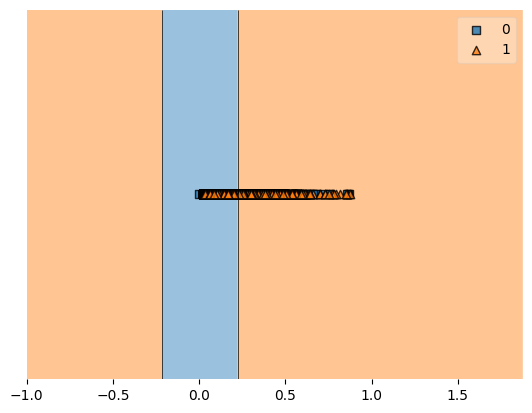

In [15]:
import sklearn 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
from mlxtend.plotting import plot_decision_regions
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

df=pd.read_csv('ML_dataset_2.0.csv')
df.head()   
# Assume X contains features (including speechiness) and y contains labels
# Split the data into training and test sets
y_data = df.iloc[:, 23]
y_list = np.array(y_data.tolist())
y = y_list.reshape(-1, 1)
speechiness_data = df.iloc[:, 16]
x_list = np.array(speechiness_data.tolist())
x = x_list.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18390241, random_state=42)

#Guassian classifier:
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)
#kernel = 1.0 * RBF(1.0)
#classifier = GaussianProcessClassifier(kernel=kernel)
#classifier.fit(x_train_scaled, y_train)

#Random Forest classifier:
#classifier = RandomForestClassifier(n_estimators=100)
#classifier.fit(x_train, y_train)

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_predicted = classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

plot_decision_regions(np.array(x), np.array(y_data.astype(np.integer)), clf=classifier); 